In [1]:
# install PyAudio http://people.csail.mit.edu/hubert/pyaudio/
# pip install pyaudio
import pyaudio
import wave
import sys

# default settings for record and playback
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050

In [12]:
import contextlib

wave_file = "datasets/sound/chord.wav"
wf = wave.open(wave_file, 'rb')
data = wf.readframes(-1)

with contextlib.closing(wf) as f:
    FRAMES = f.getnframes()
    RATE = f.getframerate()
    CHANNELS = f.getnchannels()
    DURATION = FRAMES / float(RATE)
    print("Rate: {}, frames: {}, channels: {}, time: {}".format(RATE, FRAMES, CHANNELS, DURATION))

Rate: 22050, frames: 42560, channels: 1, time: 1.9301587301587302


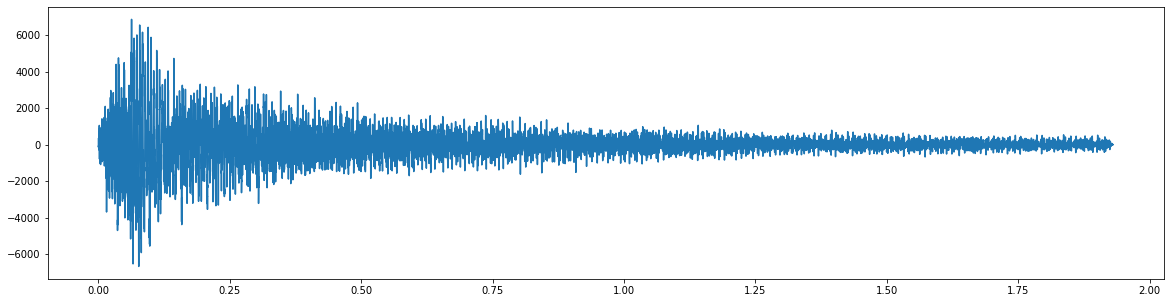

In [13]:
import numpy as np
import matplotlib.pyplot as plt

signal = np.frombuffer(data, np.int16)
time = [float(i) * DURATION / len(signal) for i in range(len(signal))]
plt.figure(figsize=(20, 5))
plt.plot(time, signal)
plt.show()

1. Convert to frequencies
2. Find major frequencies. Do it automatically (with code, not with your eyes)
3. Can you say what is the chord?

Refer to [this document](https://pages.mtu.edu/~suits/notefreqs.html) to learn note frequencies. Or compute the table.

In [25]:
notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "H"]
note2num = dict((v, k) for k, v in enumerate(notes))
note2freq = dict((n, []) for n in notes)
note2freq["A"] = [110, 220, 440, 880, 1760]

step = 2. ** (1 / 12)
for note, arr in note2freq.items():
    if note == "A": continue
    for freq in note2freq["A"]:
        arr.append(freq * step ** (note2num[note] - note2num["A"]))